In [1]:
import os; os.chdir('../..')  # use the repo's root as base for local modules import
import eql
from detection_rules.ast_dag import draw_ast

def draw(query):
    with eql.parser.elasticsearch_syntax:
        try:
            return draw_ast(eql.parse_query(query))
        except Exception as e:
            print(e)

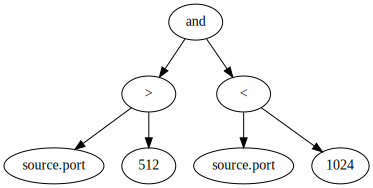

In [2]:
draw('''
    network where source.port > 512 and source.port < 1024
''')

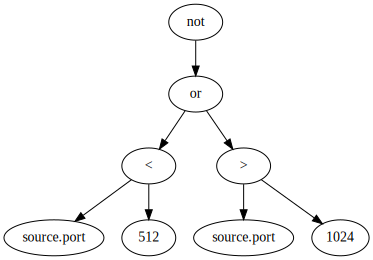

In [3]:
draw('''
    network where not (source.port < 512 or source.port > 1024)
''')

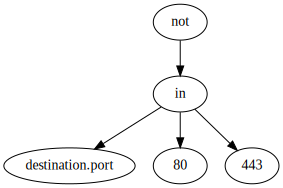

In [4]:
draw('''
    network where destination.port not in (80, 443)
''')

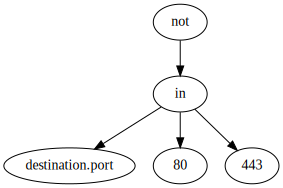

In [5]:
draw('''
    network where not destination.port in (80, 443)
''')

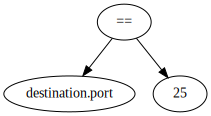

In [6]:
draw('''
    network where destination.port == 22 and destination.port in (80, 443) or destination.port == 25
''')

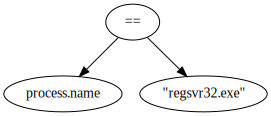

In [7]:
draw('''
    process where process.name == "regsvr32.exe"
''')

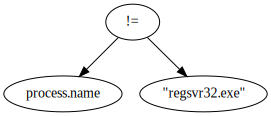

In [8]:
draw('''
    process where process.name != "regsvr32.exe"
''')

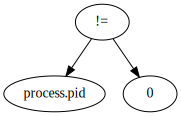

In [9]:
draw('''
    process where process.pid != 0
''')

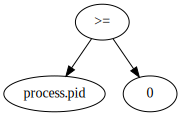

In [10]:
draw('''
    process where process.pid >= 0
''')

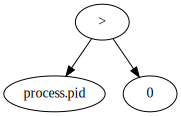

In [11]:
draw('''
    process where process.pid > 0
''')

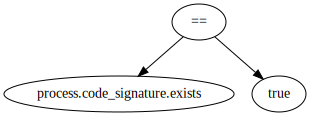

In [12]:
draw('''
    process where process.code_signature.exists == true
''')

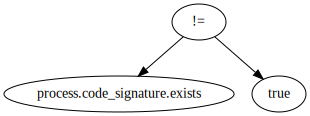

In [13]:
draw('''
    process where process.code_signature.exists != true
''')

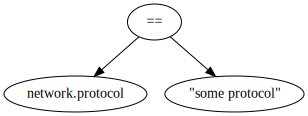

In [14]:
draw('''
    any where network.protocol == "some protocol"
''')

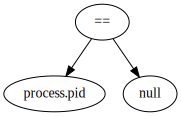

In [15]:
draw('''
    any where process.pid == null
''')

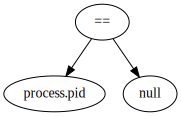

In [16]:
draw('''
    any where not process.pid != null
''')

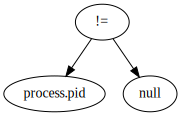

In [17]:
draw('''
    any where process.pid != null
''')

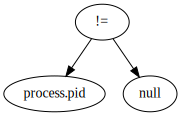

In [18]:
draw('''
    any where not process.pid == null
''')

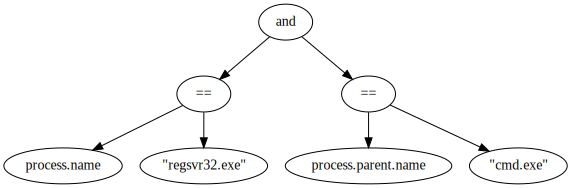

In [19]:
draw('''
    process where process.name == "regsvr32.exe" and process.parent.name == "cmd.exe"
''')

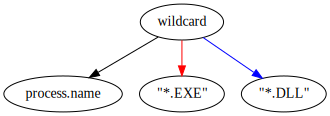

In [20]:
draw('''
    process where process.name : ("*.EXE", "*.DLL")
''')

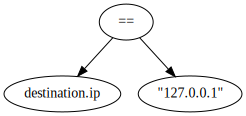

In [21]:
draw('''
    network where destination.ip == "127.0.0.1"
''')

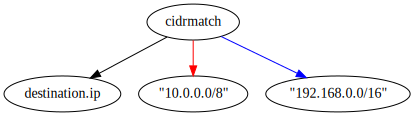

In [22]:
draw('''
    network where cidrMatch(destination.ip, "10.0.0.0/8", "192.168.0.0/16")
''')

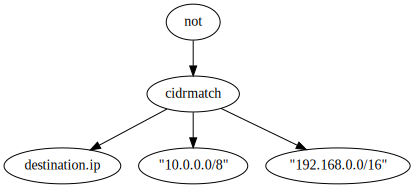

In [23]:
draw('''
    network where not cidrMatch(destination.ip, "10.0.0.0/8", "192.168.0.0/16")
''')

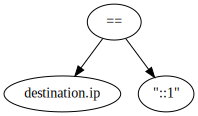

In [24]:
draw('''
    network where destination.ip == "::1"
''')

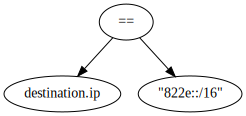

In [25]:
draw('''
    network where destination.ip == "822e::/16"
''')

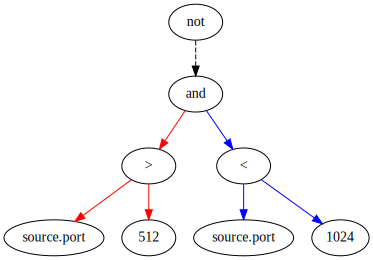

In [26]:
draw('''
    network where not (source.port > 512 and source.port < 1024)
''')

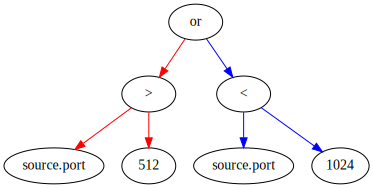

In [27]:
draw('''
    network where source.port > 512 or source.port < 1024
''')

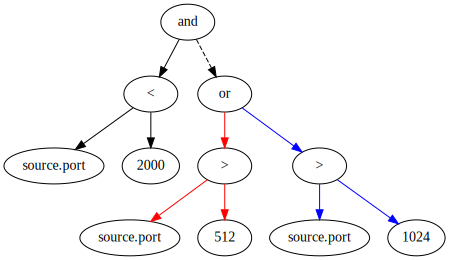

In [28]:
draw('''
    network where source.port < 2000 and (source.port > 512 or source.port > 1024)
''')

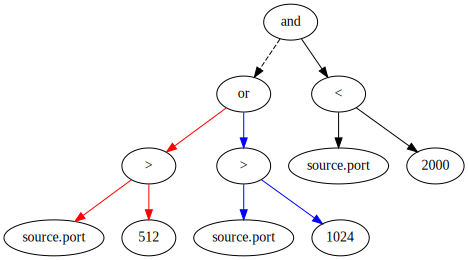

In [29]:
draw('''
    network where (source.port > 512 or source.port > 1024) and source.port < 2000
''')

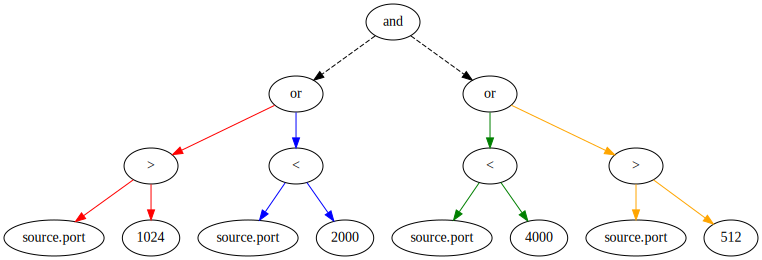

In [30]:
draw('''
    network where (source.port > 1024 or source.port < 2000) and (source.port < 4000 or source.port > 512)
''')

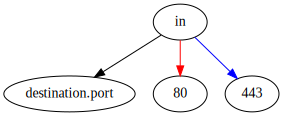

In [31]:
draw('''
    network where destination.port in (80, 443)
''')

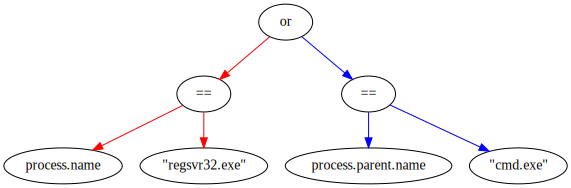

In [32]:
draw('''
    process where process.name == "regsvr32.exe" or process.parent.name == "cmd.exe"
''')

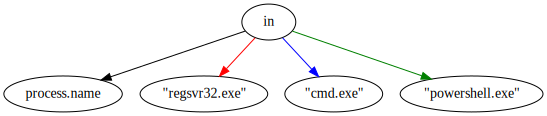

In [33]:
draw('''
    process where process.name == "regsvr32.exe" or process.name == "cmd.exe" or process.name == "powershell.exe"
''')

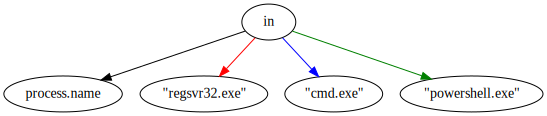

In [34]:
draw('''
    process where process.name in ("regsvr32.exe", "cmd.exe", "powershell.exe")
''')

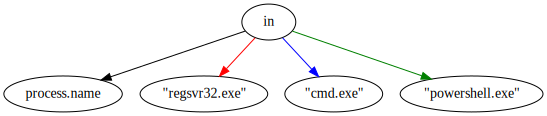

In [35]:
draw('''
    process where process.name in ("regsvr32.exe", "cmd.exe") or process.name == "powershell.exe"
''')

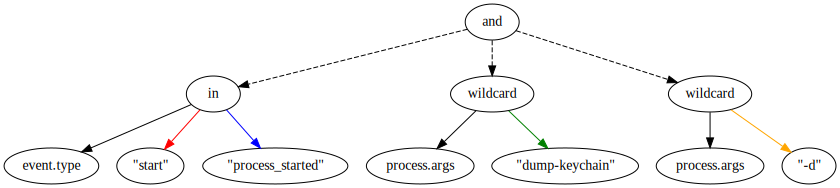

In [36]:
draw('''
    process where event.type in ("start", "process_started") and process.args : "dump-keychain" and process.args : "-d"
''')

In [37]:
draw('''
    sequence
        [process where process.name : "cmd.exe"]
        [process where process.parent.name : "cmd.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [38]:
draw('''
    sequence by user.id
        [process where process.name : "cmd.exe"]
        [process where process.parent.name : "cmd.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [39]:
draw('''
    sequence
        [process where process.name : "cmd.exe"] by user.id
        [process where process.parent.name : "cmd.exe"] by user.name
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [40]:
draw('''
    sequence
        [process where process.name : "cmd.exe"]
        [process where process.parent.name : "cmd.exe" or process.name : "powershell.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [41]:
draw('''
    sequence by user.id
        [process where process.name : "cmd.exe"]
        [process where process.parent.name : "cmd.exe" or process.name : "powershell.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [42]:
draw('''
    sequence
        [process where process.name in ("cmd.exe", "powershell.exe")] by process.name
        [process where process.name in ("cmd.exe", "powershell.exe")] by process.parent.name
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [43]:
draw('''
    sequence by user.id
        [process where process.name in ("cmd.exe", "powershell.exe")] by process.name
        [process where process.name in ("cmd.exe", "powershell.exe")] by process.parent.name
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


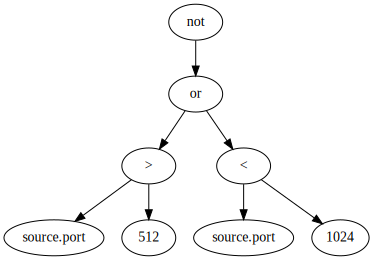

In [44]:
draw('''
    network where not (source.port > 512 or source.port < 1024)
''')

In [45]:
draw('''
    sequence by process.name
        [process where process.name : "cmd.exe"]
        [process where process.name : "powershell.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [46]:
draw('''
    sequence
        [process where process.name : "cmd.exe"] by process.name
        [process where process.parent.name : "powershell.exe"] by process.parent.name
''')

Unable to draw node type: <class 'eql.ast.Sequence'>


In [47]:
draw('''
    sequence by process.name
        [process where process.name == null]
        [process where process.name : "powershell.exe"]
''')

Unable to draw node type: <class 'eql.ast.Sequence'>
